In [496]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [497]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [498]:
df=pd.read_csv('HousingData.csv')

In [499]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [500]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [501]:
len(df)

506

In [502]:
df.shape

(506, 14)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [504]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [505]:
df.isna().mean()*100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

In [506]:
miss_value_col=[col for col in df.columns if df[col].isna().mean()<0.05 and df[col].isna().mean()>0] 
    

In [507]:
miss_value_col

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [508]:
# all missing value are <5% per column it means we can remove
#apply CAA

In [509]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [510]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

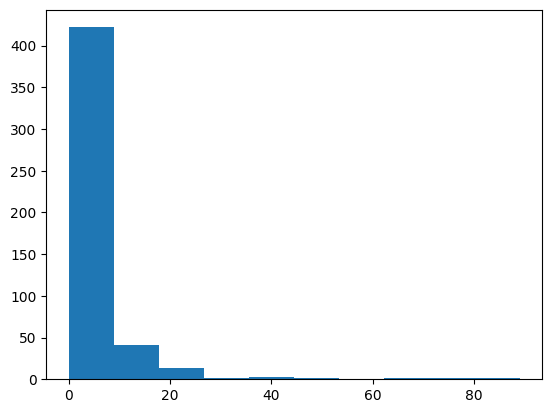

In [511]:
plt.hist(df['CRIM'])
plt.show()

In [512]:
new_df=df.dropna()

In [513]:
new_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

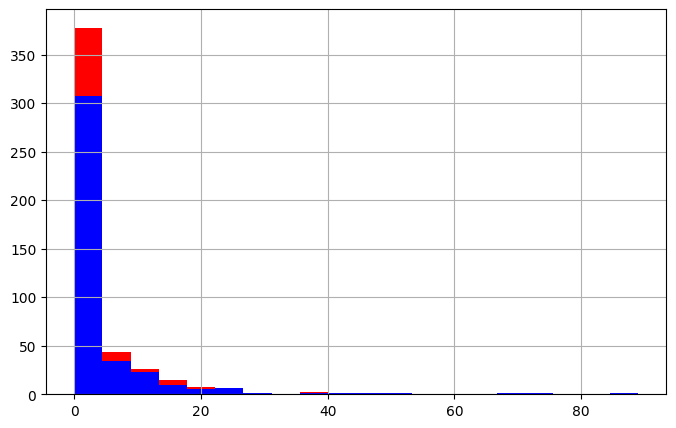

In [514]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
df['CRIM'].hist(bins=20,ax=ax,color='red' )
new_df['CRIM'].hist(bins=20,ax=ax, color='blue')
plt.show()

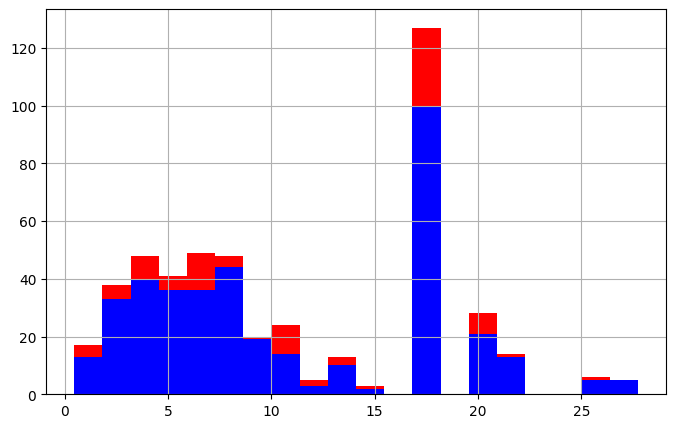

In [515]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
df['INDUS'].hist(bins=20,ax=ax,color='red' )
new_df['INDUS'].hist(bins=20,ax=ax, color='blue')
plt.show()

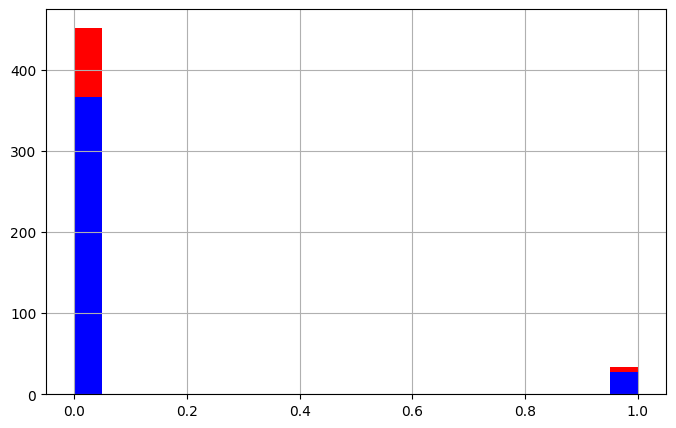

In [516]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
df['CHAS'].hist(bins=20,ax=ax,color='red' )
new_df['CHAS'].hist(bins=20,ax=ax, color='blue')
plt.show()

In [517]:
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [518]:
X=new_df.iloc[:, :-1]
y=new_df.iloc[:, -1]

In [519]:
X.shape, y.shape

((394, 13), (394,))

In [520]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [521]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [522]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [523]:
X_train.shape, X_test.shape

((315, 13), (79, 13))

In [524]:
y_train.shape, y_test.shape

((315,), (79,))

In [525]:
from sklearn.linear_model import LinearRegression

In [526]:
model=LinearRegression()

In [527]:
model.fit(X_train, y_train)

LinearRegression()

In [528]:
model.coef_

array([-9.53012946e-02,  3.89290987e-02,  2.33917058e-02,  3.81829596e+00,
       -1.80701819e+01,  3.85244133e+00, -8.22120380e-03, -1.43303959e+00,
        2.37177980e-01, -9.59284468e-03, -8.43337846e-01,  7.68163477e-03,
       -5.22587434e-01])

In [529]:
model.intercept_

34.780894962838644

In [530]:
y_pred=model.predict(X_test)

In [531]:
y_pred

array([24.68834581, 26.74233915, 12.89087213, 11.49414015, 39.90533951,
       30.52133836, 29.08104656, 22.72883526, 28.75542852, 19.16673868,
       18.1465858 , 21.75833155, 13.43530865, 45.02437309, 20.10069997,
       25.27045138, 20.92991771, 27.51223841, 10.83046983, 22.44088983,
       27.40786341, 24.29448802,  8.05578353, 24.93918388, 18.85402986,
        7.51651657, 20.19910908,  7.64808077, 27.73002549, 23.42784862,
       17.31365615, 23.91578903, 28.58059128, 17.31926357, 34.1485491 ,
       25.38079906, 42.27275147, 15.8143932 , 32.77264922, 15.90046264,
       31.79776568, 25.23501469, 14.25094856, 22.98609182, 19.23563972,
       41.09446529, 20.180802  , 27.23850831, 21.42411242, 19.91489125,
       23.79468582, 37.01799475, 27.31236949, 22.58170962, 15.04319011,
       32.78420093,  9.41553439, 17.74654321, 16.61009787, 16.9432328 ,
        0.33462524, 21.79526904, 30.7798415 , 23.03653808, 34.77807374,
       28.58214015,  5.61655699, 19.66003394, 19.77526142, 17.13

In [532]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [533]:
print("mse=",mean_squared_error(y_test, y_pred))
print("mae=",mean_absolute_error(y_test, y_pred))
print("rmse=",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2=",r2_score(y_test, y_pred))

for i,col_name in enumerate(X_train.columns): 
    print(f"{col_name} = {model.coef_[i]}")

mse= 18.361471173410596
mae= 3.2507977378004864
rmse= 4.2850287249224595
r2= 0.7942508981292835
CRIM = -0.095301294646497
ZN = 0.038929098697363496
INDUS = 0.023391705823985233
CHAS = 3.818295955795459
NOX = -18.07018186833592
RM = 3.852441330823296
AGE = -0.008221203801323969
DIS = -1.4330395936137041
RAD = 0.23717798038840648
TAX = -0.009592844675926984
PTRATIO = -0.8433378460651993
B = 0.007681634773161954
LSTAT = -0.5225874336730106


In [541]:
from sklearn.linear_model import Ridge
Ridge_model=Ridge(alpha=0.5)
Ridge_model.fit(X_train, y_train)
print(r2_score(y_test,Ridge_model.predict(X_test)))

for i,col_name in enumerate(X_train.columns): 
    print(f"{col_name} = {Ridge_model.coef_[i]}")

0.7931002088366201
CRIM = -0.09187942312340816
ZN = 0.039881801964770376
INDUS = -0.0061655112783683946
CHAS = 3.713420127434028
NOX = -11.330619258092096
RM = 3.909466228382334
AGE = -0.01374869054029749
DIS = -1.3378551067430133
RAD = 0.21024625501531455
TAX = -0.00956509544332559
PTRATIO = -0.7839275253226137
B = 0.008142331152652515
LSTAT = -0.525295230971661


In [542]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
print(r2_score(y_test,lasso_model.predict(X_test)))

for i,col_name in enumerate(X_train.columns): 
    print(f"{col_name} = {lasso_model.coef_[i]}")



0.7561556610190493
CRIM = -0.07740572680509047
ZN = 0.03869805139958406
INDUS = -0.01939114452811089
CHAS = 0.0
NOX = -0.0
RM = 2.526256831394386
AGE = -0.0
DIS = -0.8909136750363126
RAD = 0.18285829364849965
TAX = -0.010944823432989515
PTRATIO = -0.715198380622176
B = 0.008351987911896237
LSTAT = -0.6384436717109164


In [545]:
from sklearn.linear_model import ElasticNet
elastic_model=ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
print(r2_score(y_test,elastic_model.predict(X_test)))

for i,col_name in enumerate(X_train.columns): 
    print(f"{col_name} = {elastic_model.coef_[i]}")

0.7421442878554072
CRIM = -0.08486549508053434
ZN = 0.042461258827549565
INDUS = -0.04642180944020972
CHAS = 0.0
NOX = -0.0
RM = 1.7276152772412001
AGE = 0.004179122633795593
DIS = -0.9625156023770468
RAD = 0.20930178185167878
TAX = -0.011446043258892409
PTRATIO = -0.7610354826678482
B = 0.007669869076914202
LSTAT = -0.6880962354069295


In [544]:
# till now model is giving good accuracy without regularization

In [549]:
from sklearn.linear_model import RidgeCV
Ridge_model=RidgeCV(cv=5)
Ridge_model.fit(X_train, y_train)
print(r2_score(y_test,Ridge_model.predict(X_test)))

for i,col_name in enumerate(X_train.columns): 
    print(f"{col_name} = {Ridge_model.coef_[i]}")

0.7942680419183162
CRIM = -0.0943064350463368
ZN = 0.039196500945032936
INDUS = 0.014940300453168838
CHAS = 3.7970669838349376
NOX = -16.147927985837516
RM = 3.8706207203925693
AGE = -0.009821325119721908
DIS = -1.4058876187474192
RAD = 0.22938467095270712
TAX = -0.009580381429434025
PTRATIO = -0.8261970140188962
B = 0.007812258691763322
LSTAT = -0.5232217611299265


In [551]:
from sklearn.linear_model import LassoCV
lasso_model=LassoCV(cv=5)
lasso_model.fit(X_train, y_train)
print(r2_score(y_test,lasso_model.predict(X_test)))

for i,col_name in enumerate(X_train.columns): 
    print(f"{col_name} = {lasso_model.coef_[i]}")


0.7335550030072587
CRIM = -0.07004259054919375
ZN = 0.03733562307821701
INDUS = -0.01140840285947583
CHAS = 0.0
NOX = -0.0
RM = 1.799295859852
AGE = 0.0062593828700812865
DIS = -0.7771223616792485
RAD = 0.1756577162180733
TAX = -0.010859984304725052
PTRATIO = -0.7099610201340109
B = 0.007566766405629445
LSTAT = -0.6868563551870741


In [559]:
from sklearn.linear_model import ElasticNetCV
elastic_model=ElasticNetCV(cv=5)
elastic_model.fit(X_train, y_train)
print(r2_score(y_test,elastic_model.predict(X_test)))

for i,col_name in enumerate(X_train.columns): 
    print(f"{col_name} = {elastic_model.coef_[i]}")


0.6885335703626216
CRIM = -0.06761898331211395
ZN = 0.03814807671698062
INDUS = -0.022492853909693616
CHAS = 0.0
NOX = -0.0
RM = 0.5370016996069197
AGE = 0.023486022074471886
DIS = -0.5793654785134864
RAD = 0.18157101041531162
TAX = -0.0111459497204309
PTRATIO = -0.6651973028072878
B = 0.006302307223379476
LSTAT = -0.7659080457796795
